Q8. Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv("shows.csv")

In [21]:
df.rename(columns={"number":"episode number"},inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36 non-null     int64  
 1   url                  36 non-null     object 
 2   name                 36 non-null     object 
 3   season               36 non-null     int64  
 4   episode number       36 non-null     int64  
 5   type                 36 non-null     object 
 6   airdate              36 non-null     object 
 7   airtime              36 non-null     object 
 8   runtime              36 non-null     int64  
 9   average_rating       36 non-null     float64
 10  summary              36 non-null     object 
 11  medium_image_link    36 non-null     object 
 12  original_image_link  36 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.8+ KB


In [24]:
# Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
season_rating = df.groupby('season')['average_rating'].mean()
season_rating

season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: average_rating, dtype: float64

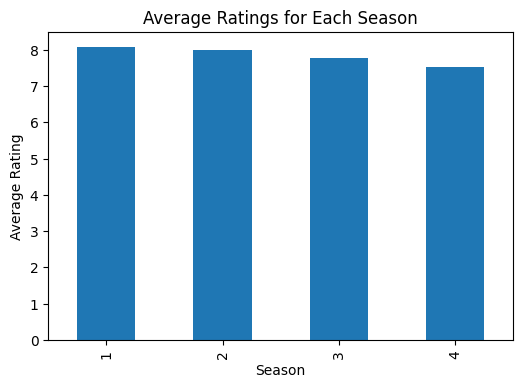

In [25]:

plt.figure(figsize=(6, 4))
season_rating.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')
plt.show()

In [26]:
# Get all the episode names, whose average rating is more than 8 for every season
rating8plus=df[df["average_rating"] > 8]
rating8plus[["name","season","episode number"]]

,name,season,episode number
6,Westworld,1,7
8,Westworld,1,9
9,Westworld,1,10
17,Westworld,2,8
18,Westworld,2,9
19,Westworld,2,10


In [28]:
df["airdate"]

0     2016-10-02
1     2016-10-09
2     2016-10-16
3     2016-10-23
4     2016-10-30
5     2016-11-06
6     2016-11-13
7     2016-11-20
8     2016-11-27
9     2016-12-04
10    2018-04-22
11    2018-04-29
12    2018-05-06
13    2018-05-13
14    2018-05-20
15    2018-05-27
16    2018-06-03
17    2018-06-10
18    2018-06-17
19    2018-06-24
20    2020-03-15
21    2020-03-22
22    2020-03-29
23    2020-04-05
24    2020-04-12
25    2020-04-19
26    2020-04-26
27    2020-05-03
28    2022-06-26
29    2022-07-03
30    2022-07-10
31    2022-07-17
32    2022-07-24
33    2022-07-31
34    2022-08-07
35    2022-08-14
Name: airdate, dtype: object

In [32]:
# Get all the episode names that aired before May 2019
aired_before_2019 = df[df["airdate"]< '2019-05-01' ]
aired_before_2019[["season", "episode number", "airdate"]]

,season,episode number,airdate
0,1,1,2016-10-02
1,1,2,2016-10-09
2,1,3,2016-10-16
3,1,4,2016-10-23
4,1,5,2016-10-30
5,1,6,2016-11-06
6,1,7,2016-11-13
7,1,8,2016-11-20
8,1,9,2016-11-27
9,1,10,2016-12-04


In [39]:
# Get the episode name from each season with the highest and lowest rating
highest_rated_epi = df.groupby('season')['average_rating'].idxmax()
lowest_rated_epi = df.groupby('season')['average_rating'].idxmin()

highest_rated_names = df.loc[highest_rated_epi, ['season', 'name', 'average_rating']]
lowest_rated_names = df.loc[lowest_rated_epi, ['season', 'name','average_rating']]

print("highest",highest_rated_names)
print("Lowest",lowest_rated_names)

highest     season       name  average_rating
9        1  Westworld             8.7
17       2  Westworld             8.7
20       3  Westworld             8.0
32       4  Westworld             7.8
Lowest     season       name  average_rating
2        1  Westworld             7.6
14       2  Westworld             7.6
25       3  Westworld             7.5
28       4  Westworld             7.1


In [43]:
# Get the summary for the most popular ( ratings ) episode in every season
most_popular_episodes = df.groupby('season')['average_rating'].idxmax()
summary_popular = df.loc[most_popular_episodes, ['season', 'name', 'episode number', 'summary']]
summary_popular

,season,name,episode number,summary
9,1,Westworld,10,Delores finds out the truth about William's fa...
17,2,Westworld,8,Another of Westworld's Host revolutionaries is...
20,3,Westworld,1,"If you're stuck in a loop, try walking in a st..."
32,4,Westworld,5,God is bored.
